In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [46]:
df= pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [48]:
df [['CustomerID','Age','Spending Score (1-100)']].describe()

,CustomerID,Age,Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,50.200000
std,57.879185,13.969007,25.823522
min,1.000000,18.000000,1.000000
25%,50.750000,28.750000,34.750000
50%,100.500000,36.000000,50.000000
75%,150.250000,49.000000,73.000000
max,200.000000,70.000000,99.000000


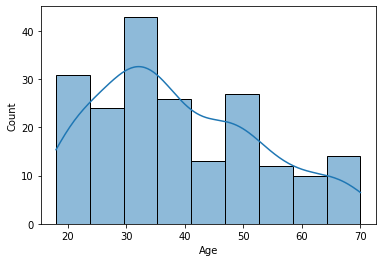

In [49]:
sns.histplot(df.Age,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


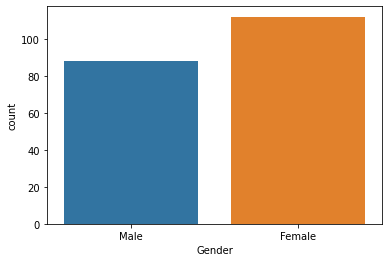

In [50]:
sns.countplot(df.Gender)

In [51]:
df.groupby(by='Spending Score (1-100)').agg('mean')[['CustomerID','Age','Annual Income (k$)']]

,CustomerID,Age,Annual Income (k$)
Spending Score (1-100),,,
1,158.0,35.5,78.0
3,9.0,64.0,19.0
4,32.0,56.5,31.5
5,115.5,35.5,63.5
6,5.0,27.5,17.0
...,...,...,...
94,8.0,23.0,18.0
95,148.0,36.5,78.5
97,166.0,29.0,88.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


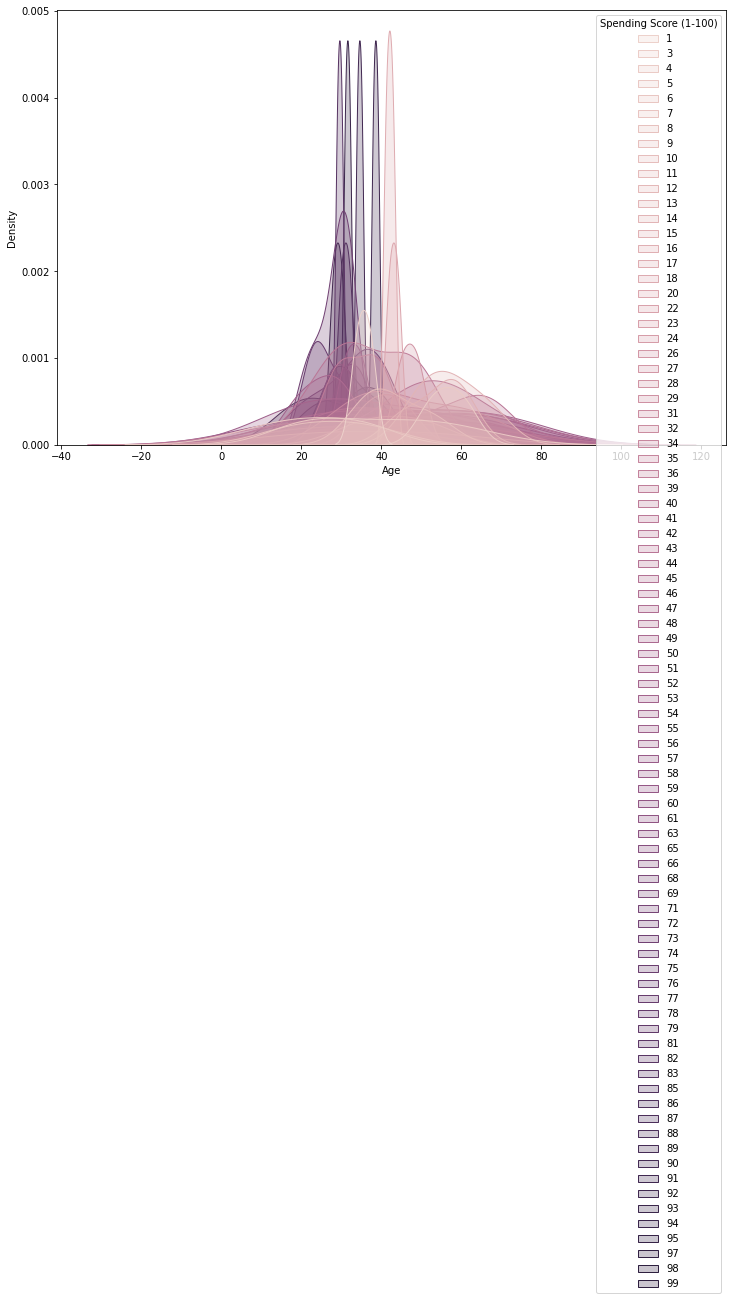

In [55]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='Age',hue='Spending Score (1-100)',fill=True)

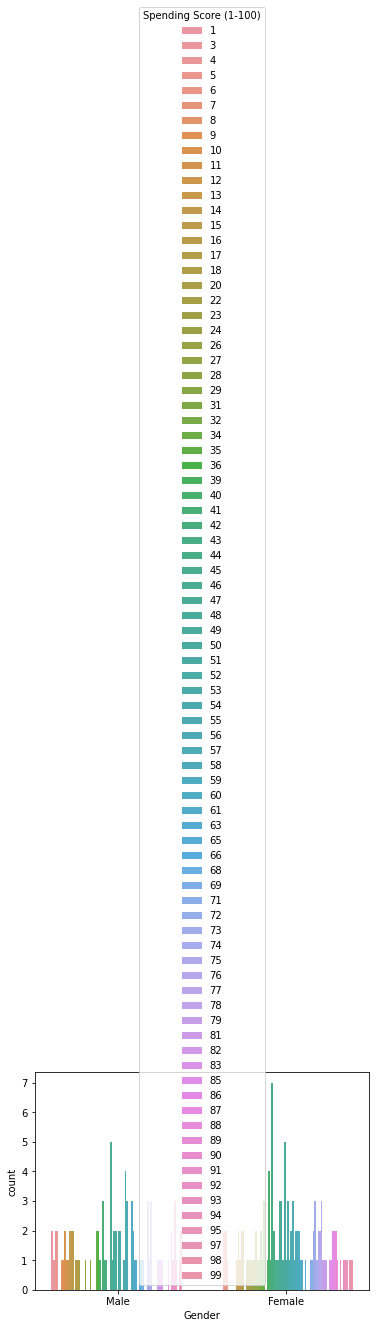

In [57]:
sns.countplot(data=df,x='Gender',hue='Spending Score (1-100)')

In [64]:
pd.crosstab(df.Gender,df.Age,margins=True)

Age,18,19,20,21,22,23,24,25,26,27,...,60,63,64,65,66,67,68,69,70,All
Gender,,,,,,,,,,,,,,,,,,,,,
Female,1,2,2,4,2,6,2,1,0,4,...,2,1,0,1,1,1,2,0,0,112
Male,3,6,3,1,1,0,2,2,2,2,...,1,1,1,1,1,3,1,1,2,88
All,4,8,5,5,3,6,4,3,2,6,...,3,2,1,2,2,4,3,1,2,200


In [67]:
all=pd.crosstab(df.Gender,df.Age,margins=True)['All']
pd.crosstab(df.Gender,df.Age).divide(all,axis=0).dropna()

Age,18,19,20,21,22,23,24,25,26,27,...,59,60,63,64,65,66,67,68,69,70
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0.008929,0.017857,0.017857,0.035714,0.017857,0.053571,0.017857,0.008929,0.000000,0.035714,...,0.000000,0.017857,0.008929,0.000000,0.008929,0.008929,0.008929,0.017857,0.000000,0.000000
Male,0.034091,0.068182,0.034091,0.011364,0.011364,0.000000,0.022727,0.022727,0.022727,0.022727,...,0.045455,0.011364,0.011364,0.011364,0.011364,0.011364,0.034091,0.011364,0.011364,0.022727


In [73]:
df.groupby(by='Age').agg('mean')[['CustomerID','Spending Score (1-100)','Annual Income (k$)']]

,CustomerID,Spending Score (1-100),Annual Income (k$)
Age,,,
18,76.750000,60.000000,51.250000
19,97.000000,39.750000,57.000000
20,59.200000,40.200000,41.600000
21,52.200000,66.800000,38.800000
22,36.666667,70.000000,31.333333
23,57.833333,63.333333,41.500000
24,49.500000,71.500000,39.250000
25,100.000000,39.666667,57.666667
26,90.000000,54.500000,58.000000


In [83]:
df[df.Gender=='Female'][['Age','Gender','Spending Score (1-100)']].agg('mean')

Age                       38.098214
Spending Score (1-100)    51.526786
dtype: float64

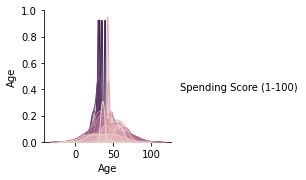

In [88]:
sns.pairplot(data=df[['Gender','Age','Spending Score (1-100)']],hue='Spending Score (1-100)')